# Importing required libraries

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread
import random
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Storing path to data folder in a variable

In [2]:
dataset_folder = '/Users/ruchamaslekar/Machine Learning/Project01-YumSnaps/archive'

# Counting images in a folder

Total number of images in the dataset: 3497


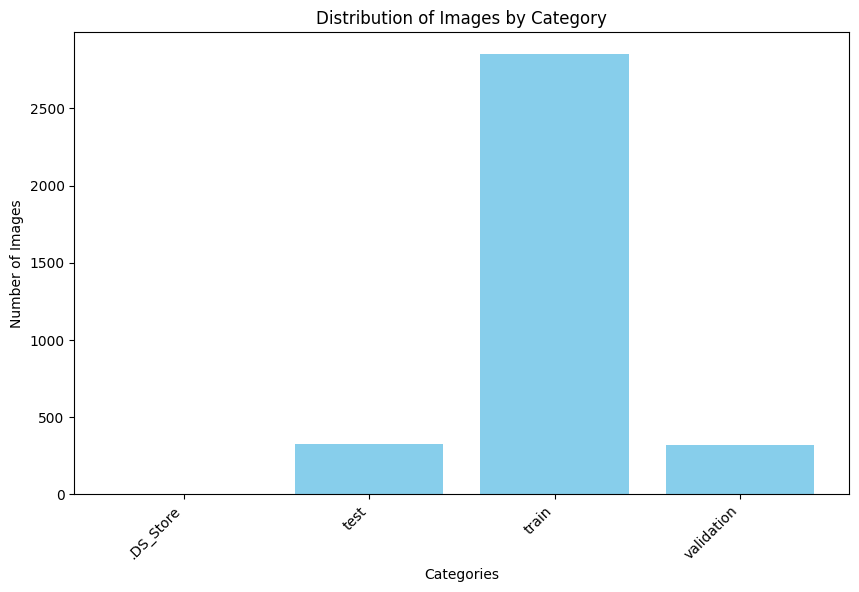

In [3]:
# Defining a function to count images in a folder
def count_images(folder_path):
    count = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                count += 1
    return count

# Counting the total number of images
total_images = count_images(dataset_folder)

# Printing the total number of images
print(f'Total number of images in the dataset: {total_images}')

# Visualizing the distribution of images by category as train, test and validation
if os.path.isdir(dataset_folder):
    categories = os.listdir(dataset_folder)
    image_counts = [count_images(os.path.join(dataset_folder, category)) for category in categories]

    # Plotting the distribution
    plt.figure(figsize=(10, 6))
    plt.bar(categories, image_counts, color='skyblue')
    plt.xlabel('Categories')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Images by Category')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Checking image resolutions and counting images of each resolution

In [4]:
# Defining a function to get image resolutions and their counts
def get_resolution_counts(folder_path):
    resolution_counts = {}

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png', '.gif')):  # Add more extensions if needed
                image_path = os.path.join(root, file)

                # Open the image using PIL
                with Image.open(image_path) as img:
                    width, height = img.size
                    resolution = (width, height)

                    # Count the resolution occurrences
                    resolution_counts[resolution] = resolution_counts.get(resolution, 0) + 1

    return resolution_counts

resolution_counts = get_resolution_counts(dataset_folder)

# Finding the resolution with the highest count
most_common_resolution = max(resolution_counts, key=resolution_counts.get)

print(f'Total number of unique resolutions: {len(resolution_counts)}\n')

print('Top 5 Resolutions and Counts:')
for resolution, count in sorted(resolution_counts.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f'Resolution: {resolution} - Count: {count}')

print(f'\nResolution with the Highest Count: {most_common_resolution} - Count: {resolution_counts[most_common_resolution]}')

Total number of unique resolutions: 1593

Top 5 Resolutions and Counts:
Resolution: (1000, 1000) - Count: 106
Resolution: (1200, 800) - Count: 65
Resolution: (800, 800) - Count: 54
Resolution: (600, 600) - Count: 49
Resolution: (1280, 720) - Count: 46

Resolution with the Highest Count: (1000, 1000) - Count: 106


# Performing distribution analysis

Total number of images: 2851
Number of Fruits Images: 856
Number of Vegetables Images: 1273


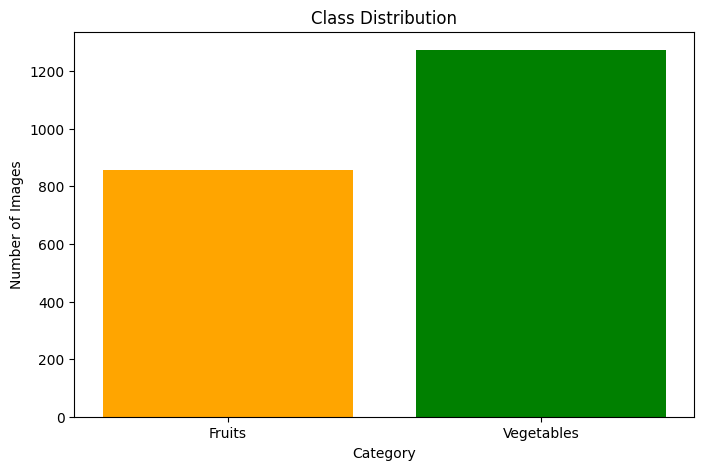

In [5]:
# Function to categorize folders into fruits and vegetables and count images
train_folder = '/Users/ruchamaslekar/Machine Learning/Project01-YumSnaps/archive/train'
def categorize_and_count_images(folder_path):
    fruit_keywords = ['apple', 'apricot', 'avocado', 'banana', 'blackberry', 'blueberry', 'cherry', 'coconut', 'date', 'dragonfruit', 'fig', 'grape', 'kiwi', 'lemon', 'lime', 'mango', 'orange', 'papaya', 'peach', 'pear', 'pineapple', 'plum', 'pomegranate', 'raspberry', 'strawberry', 'watermelon']
    vegetable_keywords = ['artichoke', 'asparagus', 'broccoli', 'cabbage', 'carrot', 'cauliflower', 'celery', 'corn', 'cucumber', 'eggplant', 'garlic', 'greenbean', 'kale', 'lettuce', 'onion', 'pepper', 'potato', 'pumpkin', 'radish', 'spinach', 'squash', 'sweetpotato', 'tomato', 'zucchini']

    total_count = 0
    fruit_count = 0
    vegetable_count = 0

    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)

        # Check if the item is a directory
        if os.path.isdir(category_path):
            # Count the number of images in each category
            image_count = len([f for f in os.listdir(category_path) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))])
            total_count += image_count

            # Check if the folder name contains keywords for fruits or vegetables
            category_lower = category.lower()
            if any(keyword in category_lower for keyword in fruit_keywords):
                fruit_count += image_count
            elif any(keyword in category_lower for keyword in vegetable_keywords):
                vegetable_count += image_count

    return total_count, fruit_count, vegetable_count

total_count, fruit_count, vegetable_count = categorize_and_count_images(train_folder)

print(f'Total number of images: {total_count}')
print(f'Number of Fruits Images: {fruit_count}')
print(f'Number of Vegetables Images: {vegetable_count}')

categories = ['Fruits', 'Vegetables']
counts = [fruit_count, vegetable_count]
plt.figure(figsize=(8, 5))
plt.bar(categories, counts, color=['orange', 'green'])
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.show()

Total number of images: 324
Number of Fruits Images: 99
Number of Vegetables Images: 141


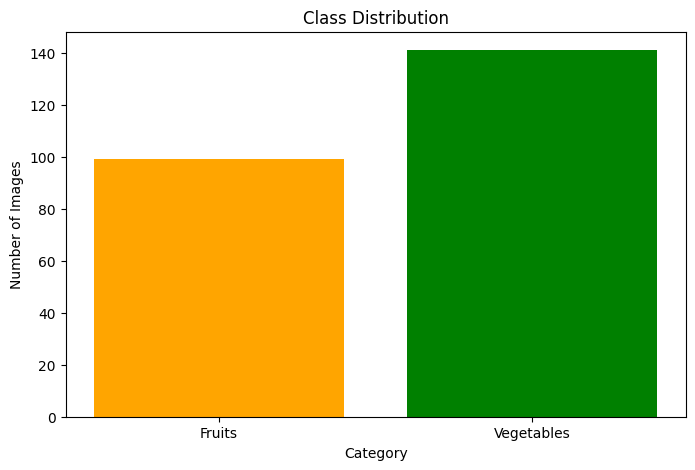

In [6]:
# Function to automatically categorize folders into fruits and vegetables and count images
test_folder = '/Users/ruchamaslekar/Machine Learning/Project01-YumSnaps/archive/test'
def categorize_and_count_images(folder_path):
    fruit_keywords = ['apple', 'apricot', 'avocado', 'banana', 'blackberry', 'blueberry', 'cherry', 'coconut', 'date', 'dragonfruit', 'fig', 'grape', 'kiwi', 'lemon', 'lime', 'mango', 'orange', 'papaya', 'peach', 'pear', 'pineapple', 'plum', 'pomegranate', 'raspberry', 'strawberry', 'watermelon']
    vegetable_keywords = ['artichoke', 'asparagus', 'broccoli', 'cabbage', 'carrot', 'cauliflower', 'celery', 'corn', 'cucumber', 'eggplant', 'garlic', 'greenbean', 'kale', 'lettuce', 'onion', 'pepper', 'potato', 'pumpkin', 'radish', 'spinach', 'squash', 'sweetpotato', 'tomato', 'zucchini']

    total_count = 0
    fruit_count = 0
    vegetable_count = 0

    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)

        # Check if the item is a directory
        if os.path.isdir(category_path):
            # Count the number of images in each category
            image_count = len([f for f in os.listdir(category_path) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))])
            total_count += image_count

            # Check if the folder name contains keywords for fruits or vegetables
            category_lower = category.lower()
            if any(keyword in category_lower for keyword in fruit_keywords):
                fruit_count += image_count
            elif any(keyword in category_lower for keyword in vegetable_keywords):
                vegetable_count += image_count

    return total_count, fruit_count, vegetable_count

# Get counts
total_count, fruit_count, vegetable_count = categorize_and_count_images(test_folder)

# Print the results
print(f'Total number of images: {total_count}')
print(f'Number of Fruits Images: {fruit_count}')
print(f'Number of Vegetables Images: {vegetable_count}')

categories = ['Fruits', 'Vegetables']
counts = [fruit_count, vegetable_count]
plt.figure(figsize=(8, 5))
plt.bar(categories, counts, color=['orange', 'green'])
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.show()

Total number of images: 322
Number of Fruits Images: 99
Number of Vegetables Images: 142


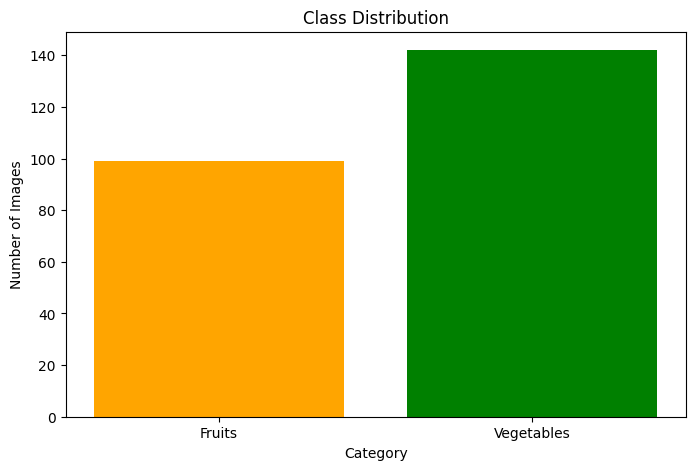

In [7]:
# Function to automatically categorize folders into fruits and vegetables and count images
dataset_folder = '/Users/ruchamaslekar/Machine Learning/Project01-YumSnaps/archive/validation'
def categorize_and_count_images(folder_path):
    fruit_keywords = ['apple', 'apricot', 'avocado', 'banana', 'blackberry', 'blueberry', 'cherry', 'coconut', 'date', 'dragonfruit', 'fig', 'grape', 'kiwi', 'lemon', 'lime', 'mango', 'orange', 'papaya', 'peach', 'pear', 'pineapple', 'plum', 'pomegranate', 'raspberry', 'strawberry', 'watermelon']
    vegetable_keywords = ['artichoke', 'asparagus', 'broccoli', 'cabbage', 'carrot', 'cauliflower', 'celery', 'corn', 'cucumber', 'eggplant', 'garlic', 'greenbean', 'kale', 'lettuce', 'onion', 'pepper', 'potato', 'pumpkin', 'radish', 'spinach', 'squash', 'sweetpotato', 'tomato', 'zucchini']

    total_count = 0
    fruit_count = 0
    vegetable_count = 0

    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)

        # Check if the item is a directory
        if os.path.isdir(category_path):
            # Count the number of images in each category
            image_count = len([f for f in os.listdir(category_path) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))])
            total_count += image_count

            # Check if the folder name contains keywords for fruits or vegetables
            category_lower = category.lower()
            if any(keyword in category_lower for keyword in fruit_keywords):
                fruit_count += image_count
            elif any(keyword in category_lower for keyword in vegetable_keywords):
                vegetable_count += image_count

    return total_count, fruit_count, vegetable_count

# Get counts
total_count, fruit_count, vegetable_count = categorize_and_count_images(dataset_folder)

# Print the results
print(f'Total number of images: {total_count}')
print(f'Number of Fruits Images: {fruit_count}')
print(f'Number of Vegetables Images: {vegetable_count}')

categories = ['Fruits', 'Vegetables']
counts = [fruit_count, vegetable_count]
plt.figure(figsize=(8, 5))
plt.bar(categories, counts, color=['orange', 'green'])
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.show()

# Function to visualize sample images from each category
def visualize_samples(dataset_path, num_samples=5):
    categories = os.listdir(dataset_path)
    
    for category in categories:
        category_path = os.path.join(dataset_path, category)
        if os.path.isdir(category_path):
            print(f"Category: {category}")
            fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
            fig.suptitle(f'Sample images for {category}', fontsize=16)
            images = os.listdir(category_path)[:num_samples]
            for i, image_file in enumerate(images):
                image_path = os.path.join(category_path, image_file)
                image = imread(image_path)
                axes[i].imshow(image)
                axes[i].axis('off')
            plt.show()

# Visualize sample images from each category
visualize_samples(train_folder)

In [8]:
def assess_class_distribution(dataset_path):
    class_counts = {}
    for category in os.listdir(dataset_path):
        category_dir = os.path.join(dataset_path, category)
        if os.path.isdir(category_dir):
            num_images = len(os.listdir(category_dir))
            class_counts[category] = num_images
    return class_counts

print("Class Distribution:")
class_distribution = assess_class_distribution(train_folder)
print("Category\tNumber of Images")
for category, count in class_distribution.items():
    print(f"{category}\t\t\t{count}")


Class Distribution:
Category	Number of Images
apple			63
turnip			92
chilli pepper			79
raddish			75
bell pepper			83
pear			86
sweetpotato			64
pomegranate			75
peas			94
capsicum			81
spinach			90
lettuce			87
kiwi			86
lemon			78
onion			84
cauliflower			74
potato			71
jalepeno			82
sweetcorn			89
cucumber			86
paprika			79
watermelon			78
mango			82
cabbage			87
grapes			93
beetroot			84
eggplant			80
corn			84
soy beans			91
banana			71
ginger			62
garlic			87
pineapple			92
tomato			87
orange			65
carrot			76


In [9]:
def plot_pixel_intensity_histograms(dataset_path):
    categories = os.listdir(dataset_path)
    plt.figure(figsize=(12, 6))
    for i, category in enumerate(categories):
        category_dir = os.path.join(dataset_path, category)
        if os.path.isdir(category_dir):
            pixel_intensity_values = []
            for image_file in os.listdir(category_dir):
                image_path = os.path.join(category_dir, image_file)
                img = np.array(Image.open(image_path))
                pixel_intensity_values.extend(img.flatten())
            plt.hist(pixel_intensity_values, bins=256, range=(0, 255), alpha=0.5, label=category)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Pixel Intensity Histograms')
    plt.legend()
    plt.show()
    

plot_pixel_intensity_histograms(train_folder)